In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans as sklKMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("../datasets/iris.data")
X = data[["sepal_length","petal_length"]]
def kMeans(X,k):
    distortion = []
    for i in range(1,k+1):
       model =sklKMeans(n_clusters=i,init='random',n_init='auto',max_iter=10).fit(X.values)
       distortion.append(model.inertia_)
    print(f"Silhoutte Score for {k} cluster is {silhouette_score(X,model.labels_)}") 
    return model,distortion
k=5
model,distortion = kMeans(X,k)
print(model.get_feature_names_out())

Silhoutte Score for 5 cluster is 0.5518894237835025
['kmeans0' 'kmeans1' 'kmeans2' 'kmeans3' 'kmeans4']


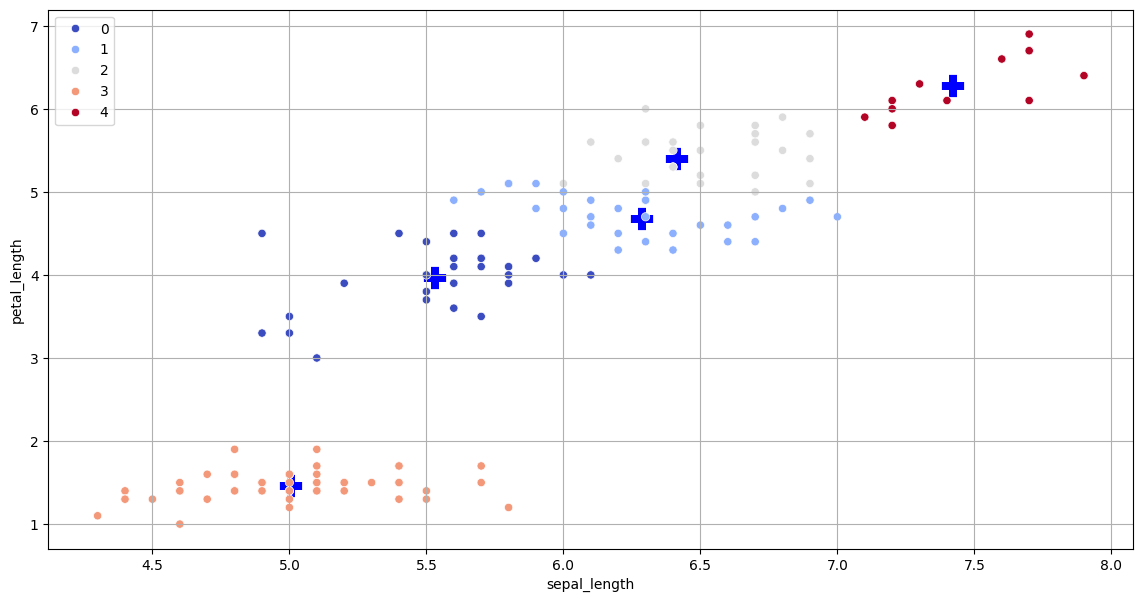

In [3]:
centroids = model.cluster_centers_
Index = model.labels_
plt.figure(figsize=(14,7))
plt.scatter(x=centroids[:,0],y=centroids[:,1],marker="+",c='b',linewidth=16)
sns.scatterplot(data=data,x="sepal_length",y="petal_length",hue=Index,palette="coolwarm")
plt.grid()
plt.savefig("K-Means_iris")


Text(0, 0.5, 'Distortion')

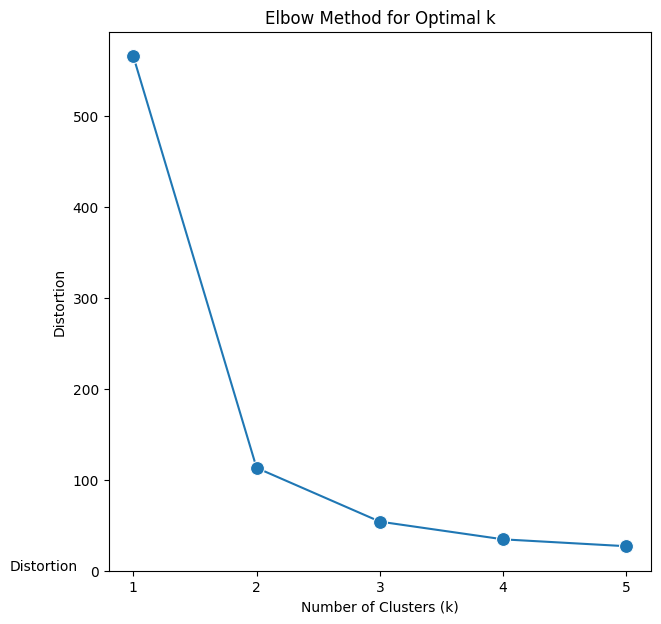

In [4]:
plt.figure(figsize=(7,7))
sns.lineplot(x=np.arange(1,k+1),y=np.array(distortion),marker="o",markersize=10)
plt.xticks(np.arange(1,k+1))
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion")
plt.text(0,0.5, 'Distortion')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [6]:
def gen_data(k=3, dim=2, points_per_cluster=2000, lim=[-10, 10]):
    x = []
    mean = np.random.rand(k, dim)*(lim[1]-lim[0]) + lim[0]
    for i in range(k):
        cov = np.random.rand(dim, dim+10)
        cov = np.matmul(cov, cov.T)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
    x = np.array(x)
    if(dim == 2):
        fig = plt.figure()
        ax = fig.gca()
        ax.scatter(x[:,0], x[:,1], s=3, alpha=0.4)
        ax.autoscale(enable=True)
    return x

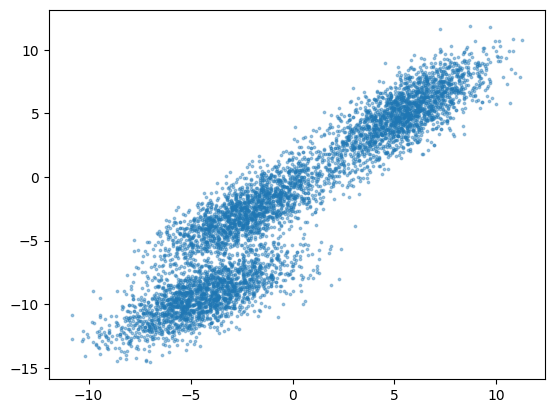

In [7]:
data = gen_data()

In [8]:
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

GaussianMixture(n_components=3)

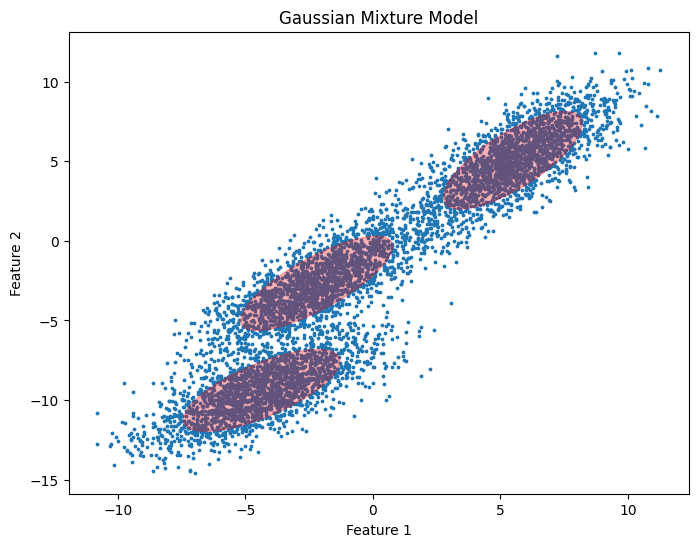

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1],s=3)
for covar, mean in zip(gmm.covariances_, gmm.means_):
    v, w = np.linalg.eigh(covar)
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1],angle=180 + angle,color='r',alpha=0.3)
    plt.gca().add_patch(ell)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model')
plt.show()

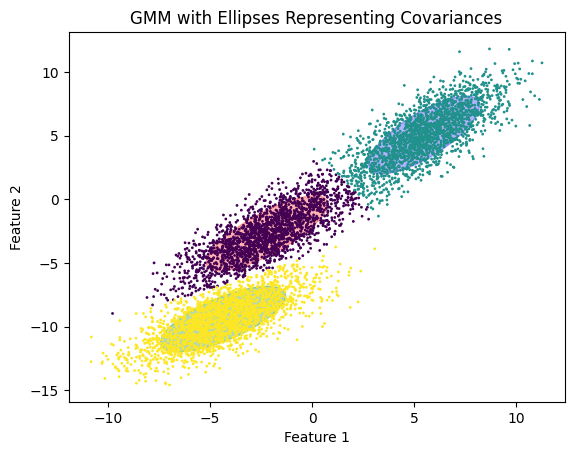

In [16]:
import matplotlib.patches as patches

def plot_gmm(gmm, X, label=True):
    ax = plt.gca()
    colors = ['red', 'blue', 'green']
    
    for i in range(gmm.n_components):
        mean = gmm.means_[i]
        cov = gmm.covariances_[i]
        
        # Eigen decomposition for the ellipse
        v, w = np.linalg.eigh(cov)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)  # Scaling factor
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180 * angle / np.pi  # Convert radians to degrees
        
        # Plot ellipse
        ell = patches.Ellipse(mean, v[0], v[1],angle= 180 + angle, color=colors[i], alpha=0.3)
        ax.add_patch(ell)
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), s=1, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('GMM with Ellipses Representing Covariances')
    plt.show()

# Generate the plot
plot_gmm(gmm, data)


In [17]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Assume X is your dataset
gmm = GaussianMixture(n_components=3, max_iter=100)
gmm.fit(data)

# Predict the cluster labels
labels = gmm.predict(data)

# Get the parameters (means, covariances, etc.)
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_

print("Cluster Means:\n", means)
print("Cluster Covariances:\n", covariances)
print("Cluster Weights:\n", weights)


Cluster Means:
 [[-2.20539575 -2.6667546 ]
 [-4.36392493 -9.39654258]
 [ 5.48800715  5.06581418]]
Cluster Covariances:
 [[[4.43345003 3.4545984 ]
  [3.4545984  4.37623049]]

 [[4.69944072 2.81502285]
  [2.81502285 3.30014318]]

 [[3.68697191 3.12480773]
  [3.12480773 4.67220862]]]
Cluster Weights:
 [0.32515404 0.33934574 0.33550021]
